In [1]:
%matplotlib inline
%precision 2
# -*- coding:gbk -*-
#https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
#http://blog.csdn.net/han_xiaoyang/article/details/49797143

'%.2f'

# https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [ ]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
full = train.append(test)
titanic = full[ :891 ]

del train , test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

In [ ]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [ ]:
train.describe()

In [ ]:
train.head()

In [ ]:
plot_correlation_map( titanic )

In [ ]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

# http://blog.csdn.net/han_xiaoyang/article/details/49797143

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data_train = pd.read_csv("Train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
def rotate_xtlabel(ax,degree):
    """
    ax: axe
    degree:旋转度数
    """
    for x in ax.get_xticklabels():
        x.set_rotation(degree) 

In [161]:
data_train[data_train.Survived==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [172]:
plt.figure(figsize=(10,5))
#生还人数对比
ax1=plt.subplot(2,3,1)
data_train.Survived.value_counts().plot(kind='bar')
ax1.set_xlabel(u"Survived")
ax1.set_ylabel(u"人数")
ax1.set_title(u"生还人数对比")
rotate_xtlabel(ax1,0)
ax1.grid(axis='y')
ax1.set_ylim(0,600)
#男女人数/生还人数对比
sex={'female':1,'male':0}#['female','male']
sex_survived=data_train[data_train.Survived==1].Sex.value_counts()
sex_unsurvived=data_train[data_train.Survived==0].Sex.value_counts()
ax2=plt.subplot(2,3,2)
data_train.Sex.value_counts().plot(kind='bar')
ax2.set_xlabel(u"Sex")
ax2.set_ylabel(u"人数")
ax2.set_title(u"男女人数对比")
rotate_xtlabel(ax2,0)
ax2.grid(axis='y')
ax2.set_ylim(0,600)
ax3=plt.subplot(2,3,3)
#plt.barh(sex,data_train[data_train.Survived==1].Sex.value_counts(),height=0.3)
#sex_survived.plot(kind='barh')
#sex_unsurvived.plot(kind='barh',left=sex_survived,color='r')
#plt.barh(sex,sex_survived,height=0.3)
plt.barh(['female','male'],sex_unsurvived,height=0.3,left=sex_survived,color='r')
#plt.yticks((0,1),(u'男',u'女'))
plt.show()

<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [115]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.scatter(data_train.Age.unique(),data_train.groupby('Age').count()['PassengerId'], '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
#ax2 = plt.subplot(1, 2, 2, sharey=ax1)
#plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

<IPython.core.display.Javascript object>


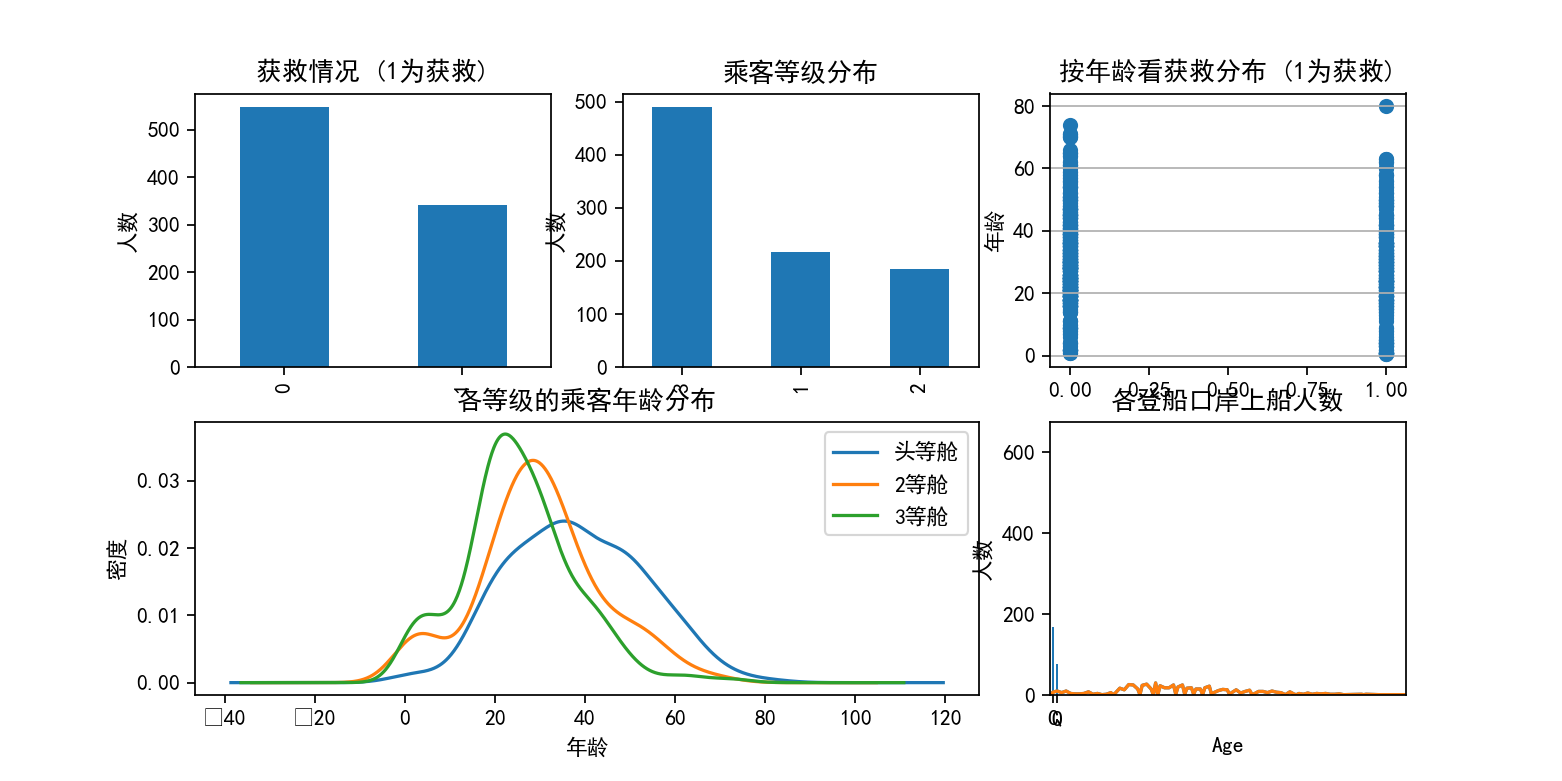

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))#图片越大，耗费内存越大
fig.set(alpha=0.5)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title("获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()